In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
scalar = tf.constant(5)  # Створення константи скаляру
vector = tf.constant([1, 2, 3])  # Створення константи вектору
matrix = tf.constant([[1, 2], [3, 4]])  # Створення константи матриці
tensor = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])  # Створення константи тензору

a = tf.constant(5)  # Створення константи a
b = tf.constant(2)  # Створення константи b

c = tf.add(a, b)  # Виконання операції додавання
d = tf.multiply(a, b)  # Виконання операції множення

print(c)  # Виведення результату операції додавання
print(d)  # Виведення результату операції множення


tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)


Epoch 1/10
25/25 [==============================] - 1s 7ms/step - loss: 4288.5874 - val_loss: 3649.1396
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 4210.0601 - val_loss: 3558.8713
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 4060.5769 - val_loss: 3375.4556
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 3780.4031 - val_loss: 3045.1316
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 3306.3481 - val_loss: 2553.3953
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 2660.9241 - val_loss: 1893.0353
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 1880.6578 - val_loss: 1227.4703
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 1156.6417 - val_loss: 678.3790
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 619.5314 - val_loss: 327.2502
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
MAE:

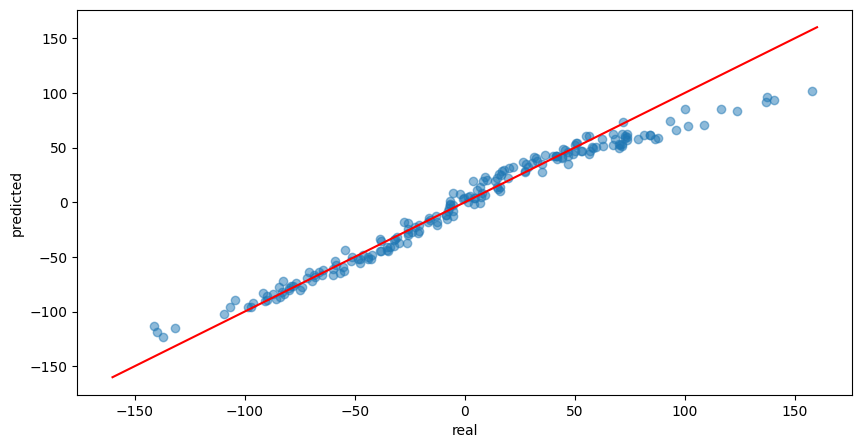

In [ ]:
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)  # Згенеруйте дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Розбиття даних на тренувальні та тестові набори

num_features = X.shape[1]  # Визначення кількості ознак

model = tf.keras.Sequential([  # Створення моделі
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),  # Перший Dense шар з 64 нейронами та активацією ReLU
    tf.keras.layers.Dense(32, activation='relu'),  # Другий Dense шар з 32 нейронами та активацією ReLU
    tf.keras.layers.Dense(1)  # Третій Dense шар з одним нейроном без активації для регресії
])

model.compile(optimizer='adam', loss='mean_squared_error')  # Компіляція моделі з оптимізатором Adam та функцією втрат MSE

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))  # Навчання моделі

loss = model.evaluate(X_test, y_test)  # Оцінка результатів

y_pred = model.predict(X_test)  # Прогнозування

mse = mean_squared_error(y_test, y_pred)  # Обчислення середньоквадратичної помилки
mae = mean_absolute_error(y_test, y_pred)  # Обчислення середньоабсолютної помилки
print("MAE:", mae)  # Виведення MAE
print("MSE:", mse)  # Виведення MSE

plt.figure(figsize=(10,5))  # Візуалізація предсказаних та тестових даних
x = np.linspace(-160, 160)
plt.plot(x, x, label='y = x', color = "red")
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('real')
plt.ylabel('predicted')
plt.show()


Цей код виконує регресійне завдання за допомогою нейронної мережі. В результаті навчання моделі отримані дуже гарні результати. Оцінка середньоквадратичної помилки (MSE) та середньоабсолютної помилки (MAE) свідчать про добре підгонку моделі до даних. Візуалізація предсказаних та фактичних значень також підтверджує високу точність моделі.

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.7984 - accuracy: 0.4170
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6470
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.8650
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.8900
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8930
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8980
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.9000
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8990
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8940
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2721 - accuracy: 0.8980
Loss: 0.27208456397

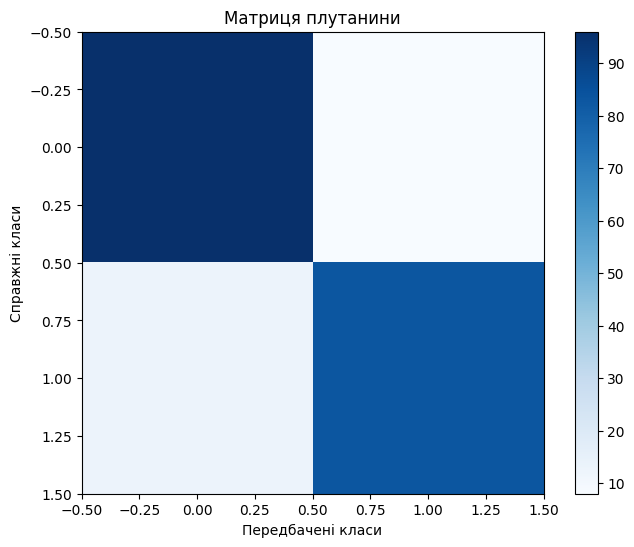

In [ ]:
# 3
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)  # Генерація даних

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Розбиття даних на тренувальний та тестовий набори

model = Sequential([  # Створення моделі
    Dense(32, activation='relu', input_shape=(2,)),  # Перший Dense шар з 32 нейронами та активацією ReLU
    Dense(1, activation='sigmoid')  # Другий Dense шар з одним нейроном та активацією sigmoid
])

model.compile(optimizer='adam',  # Компіляція моделі з оптимізатором Adam
              loss='binary_crossentropy',  # Використання функції втрат binary_crossentropy
              metrics=['accuracy'])  # Вимірювання точності

model.fit(X, y, epochs=10, batch_size=32)  # Навчання моделі

y_pred_non_binary = model.predict(X_test)  # Прогнозування неперетворених ймовірностей

y_pred = (y_pred_non_binary > 0.5).astype(int)  # Перетворення ймовірностей в бінарні класи

loss, accuracy = model.evaluate(X, y)  # Оцінка результатів

print(f'Loss: {loss}, Accuracy: {accuracy}')

accuracy = accuracy_score(y_test, y_pred)  # Визначення точності
recall = recall_score(y_test, y_pred)  # Визначення відгуку
f1 = f1_score(y_test, y_pred)  # Визначення F1-середнього
roc_auc = roc_auc_score(y_test, y_pred)  # Визначення AUC-ROC
confusion = confusion_matrix(y_test, y_pred)  # Визначення матриці плутанини

print(f'Точність: {accuracy}')
print(f'Відгук: {recall}')
print(f'F1-середнє: {f1}')
print(f'AUC-ROC: {roc_auc}')
print(f'Матриця плутанини:\n{confusion}')

plt.figure(figsize=(8, 6))  # Візуалізація матриці плутанини
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Матриця плутанини')
plt.ylabel('Справжні класи')
plt.xlabel('Передбачені класи')
plt.show()



Цей код використовує нейронну мережу для класифікації даних, згенерованих за допомогою make_classification. Після навчання моделі отримані високі результати точності та інших метрик (точність, відгук, F1-середнє, AUC-ROC). Гарна візуалізація у вигляді матриці плутанини також підтверджує високу точність моделі.